In [1]:
import matplotlib.pyplot as plt
import sys
import pandas as pd
from itertools import chain, combinations
from collections import defaultdict


Bad key "text.kerning_factor" on line 4 in
C:\Users\jayan\Anaconda\envs\tf\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


## Data-Preprocessing

In [62]:
df=pd.read_csv('dataset.csv')

In [3]:
print(df.shape)
df

(4961, 133)


,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4956,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,(vertigo) Paroymsal Positional Vertigo
4957,0,1,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,Acne
4958,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Urinary tract infection
4959,0,1,0,0,0,0,1,0,0,0,...,0,0,1,1,1,1,0,0,0,Psoriasis


In [4]:
df=df.iloc[:,:-1]
df_i=df.copy()
df_i.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Data-Visualization

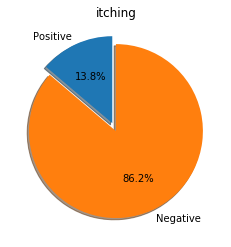

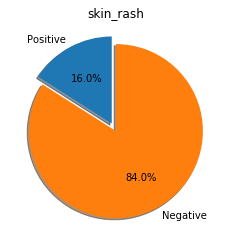

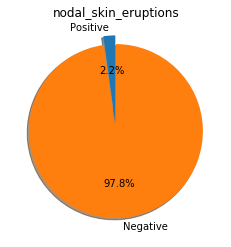

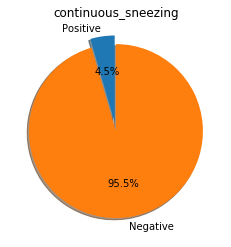

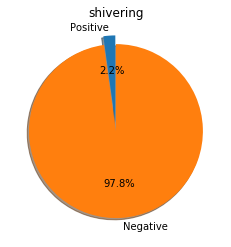

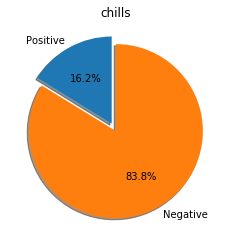

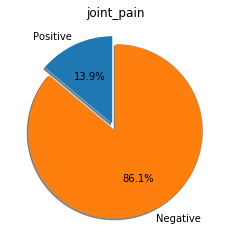

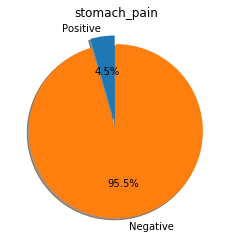

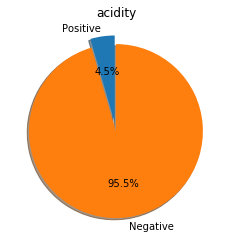

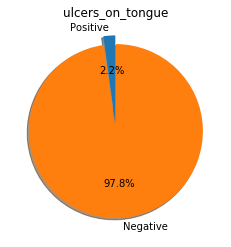

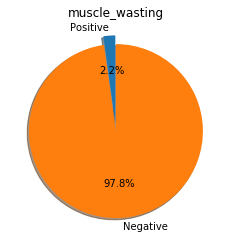

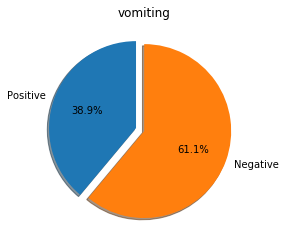

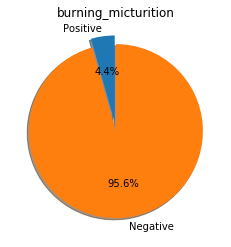

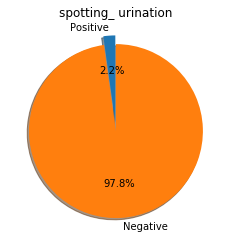

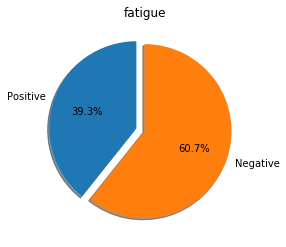

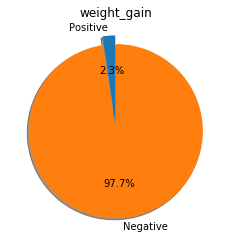

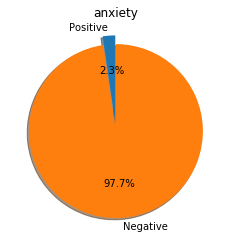

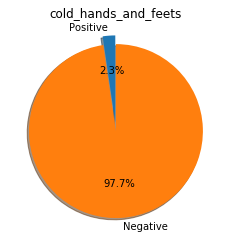

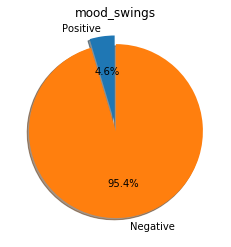

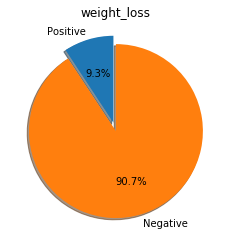

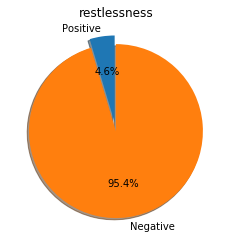

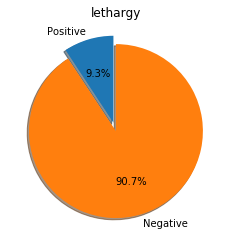

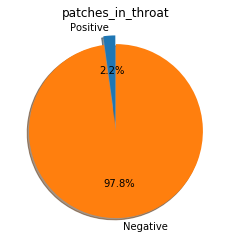

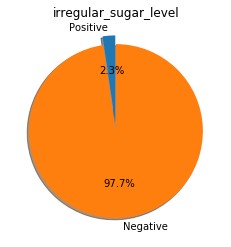

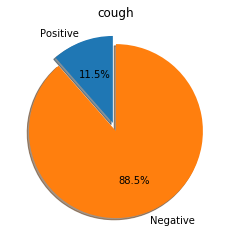

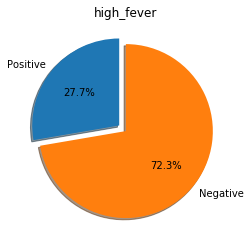

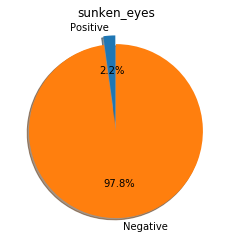

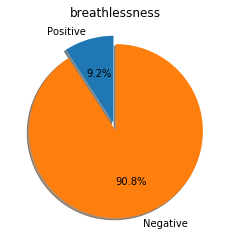

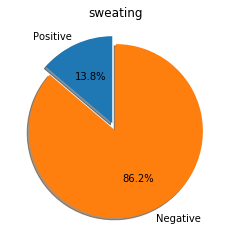

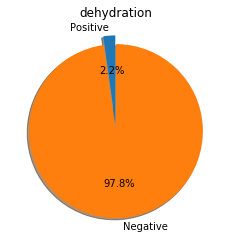

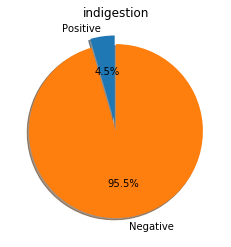

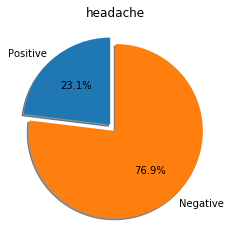

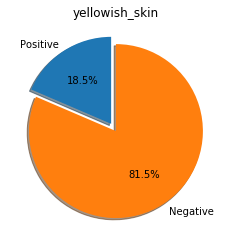

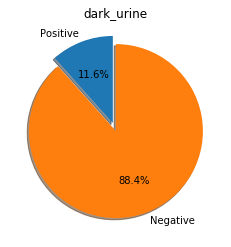

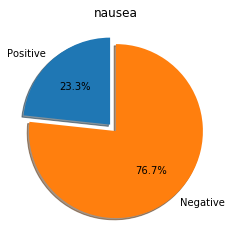

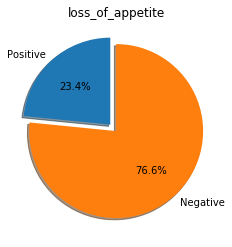

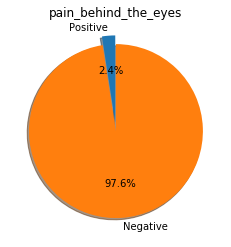

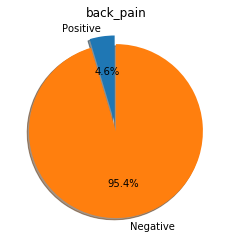

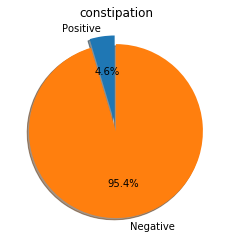

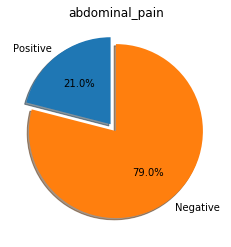

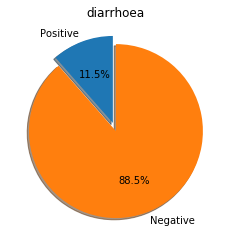

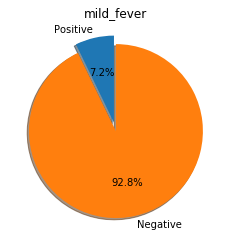

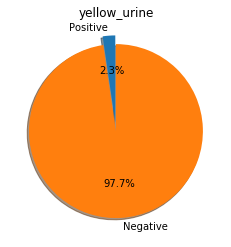

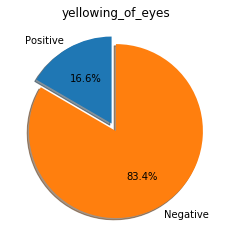

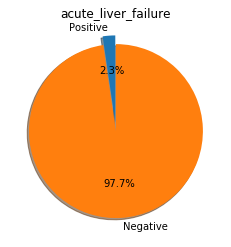

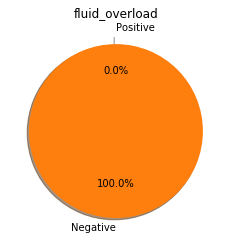

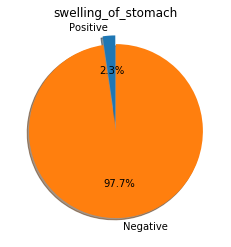

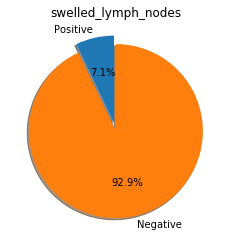

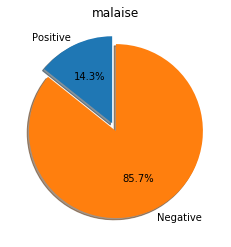

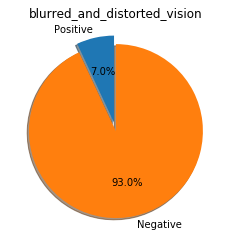

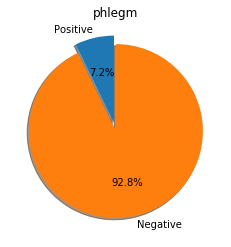

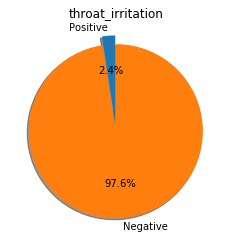

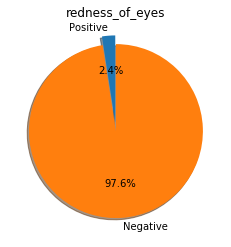

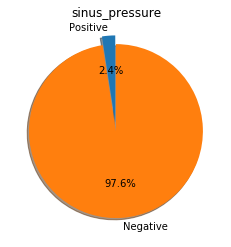

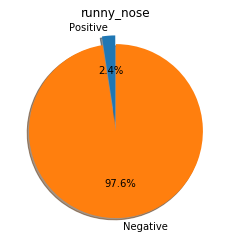

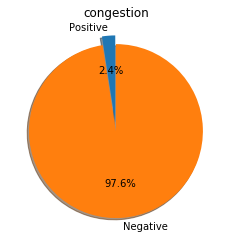

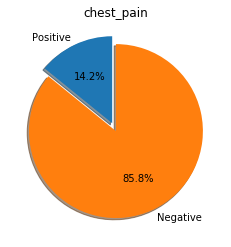

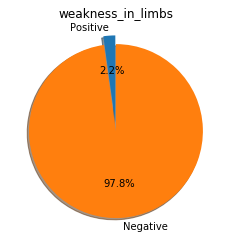

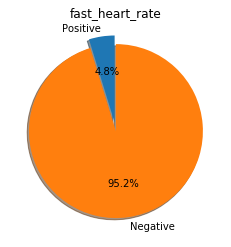

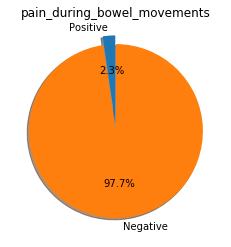

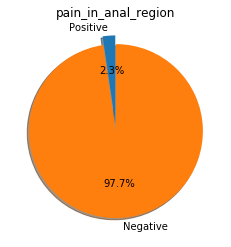

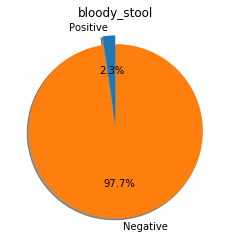

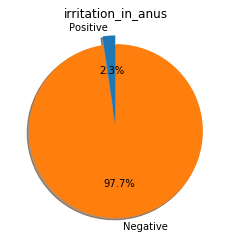

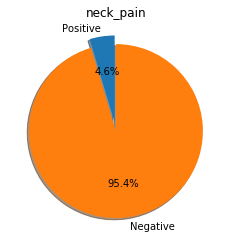

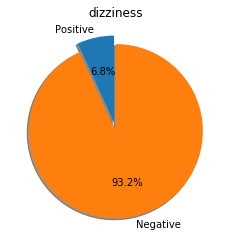

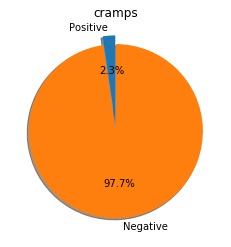

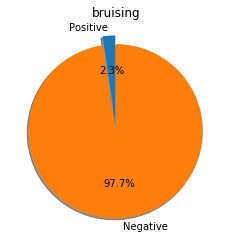

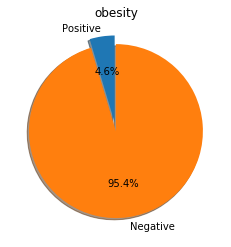

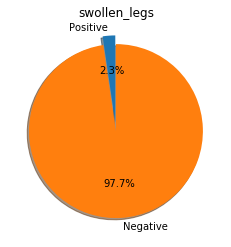

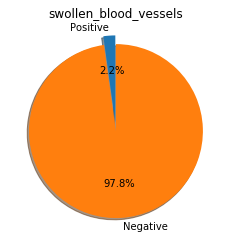

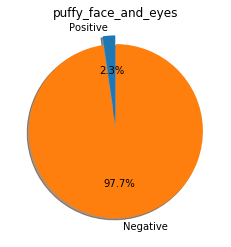

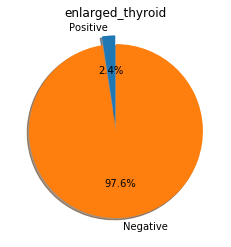

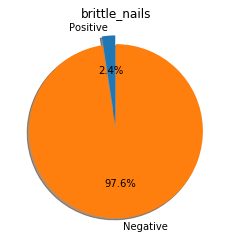

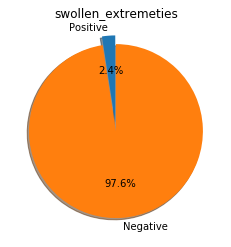

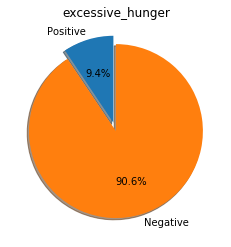

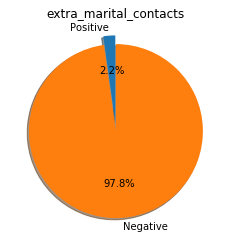

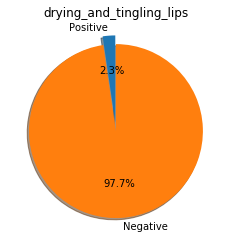

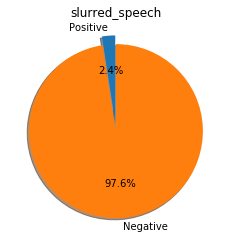

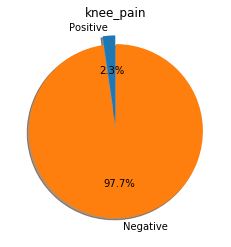

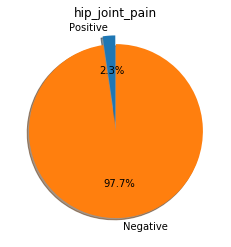

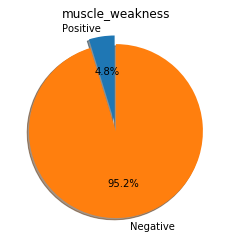

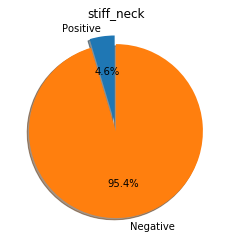

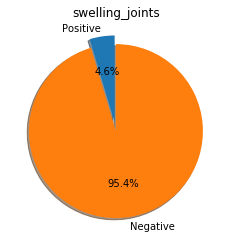

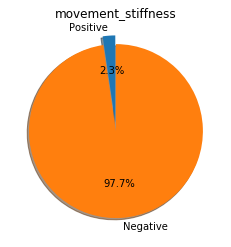

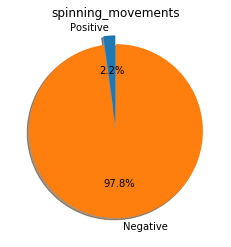

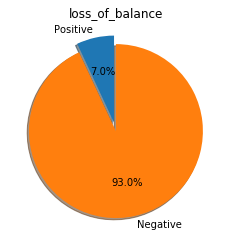

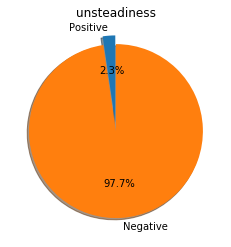

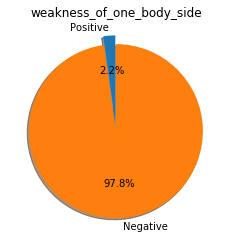

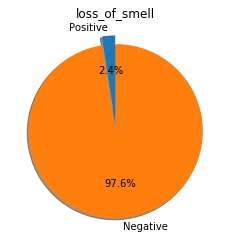

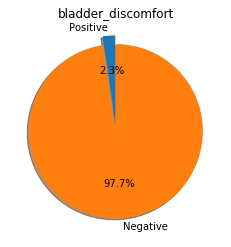

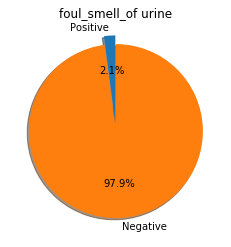

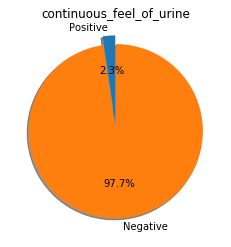

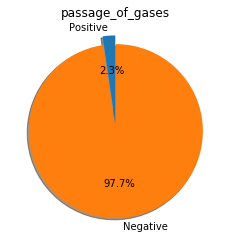

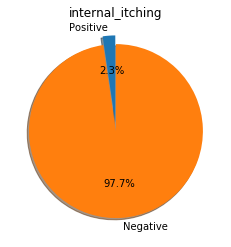

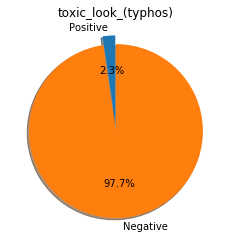

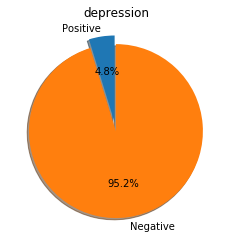

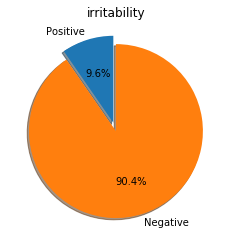

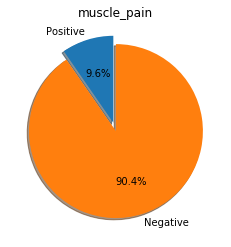

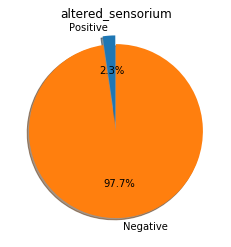

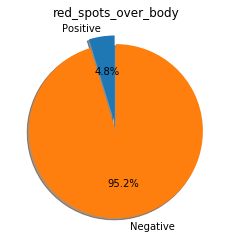

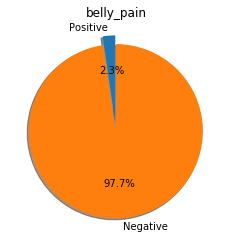

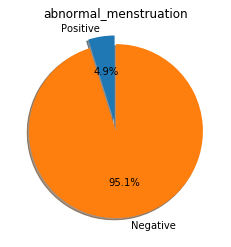

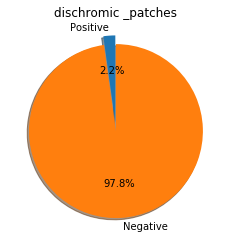

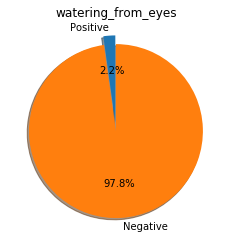

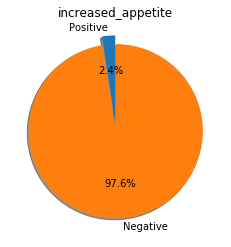

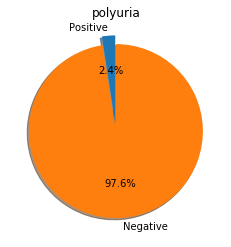

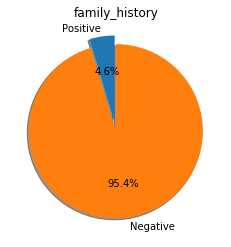

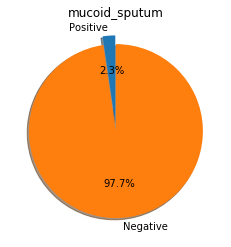

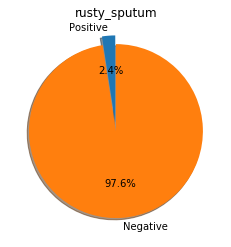

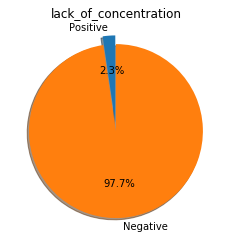

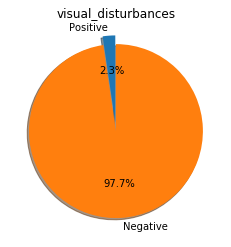

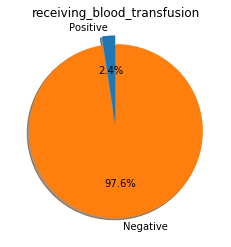

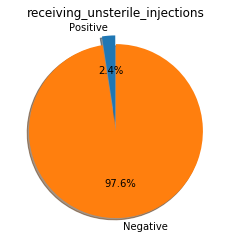

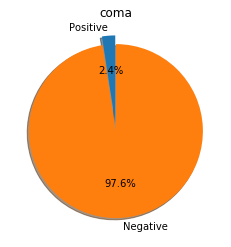

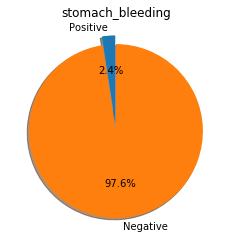

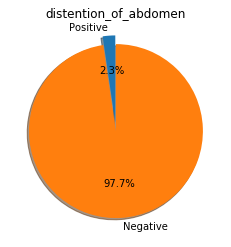

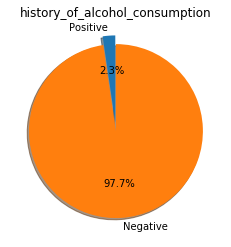

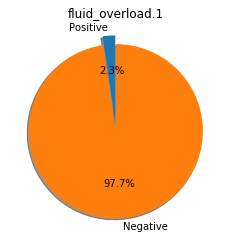

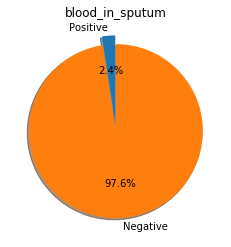

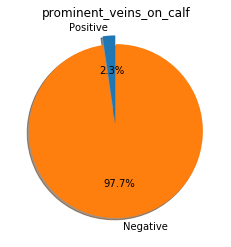

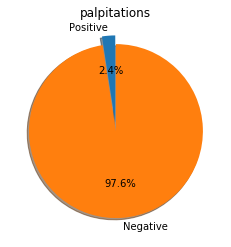

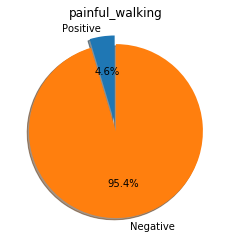

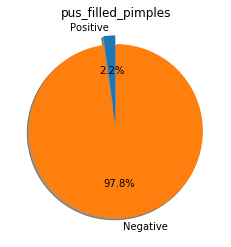

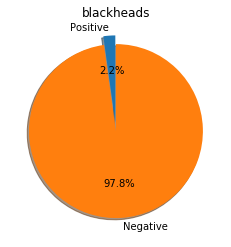

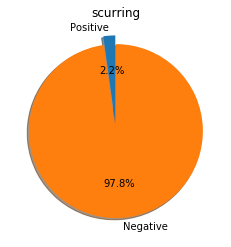

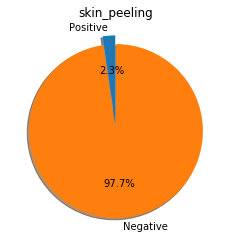

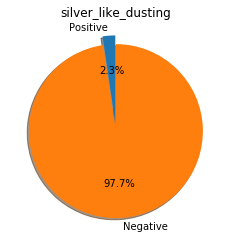

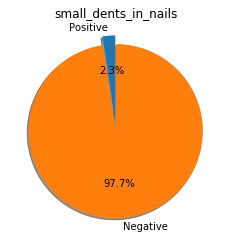

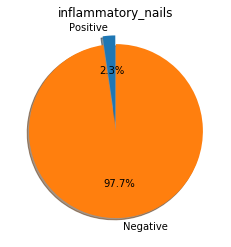

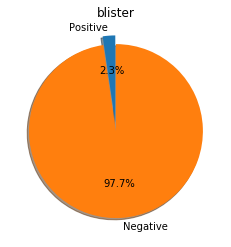

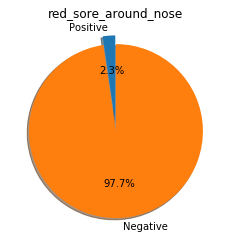

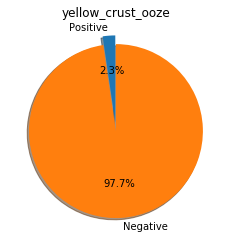

In [16]:
for i in df_i.columns:
    labels = 'Positive', 'Negative'
    sizes = [df_i.loc[:,i].sum(), 4961-df_i.loc[:,i].sum()]
    explode = (0.1, 0) 

    #fig1, ax1 = plt.subplots()
    plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=90)
    plt.title(i)
    plt.show()


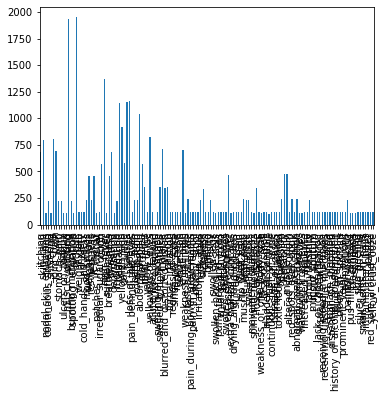

In [44]:
bar=df_i.sum().plot.bar()
fig = bar.get_figure()
fig.savefig('bar1.png',dpi=199)


In [52]:
v=1
label_dict={}
for i in df.columns:
    df[i]=df[i].replace([0,1],['nan',i])
    df_i[i]=df_i[i].replace([0,1],['nan',v])
    label_dict.update({v:i})
    v=v+1
df.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
0,itching,skin_rash,nodal_skin_eruptions,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
1,nan,skin_rash,nodal_skin_eruptions,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2,itching,nan,nodal_skin_eruptions,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
3,itching,skin_rash,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
4,itching,skin_rash,nodal_skin_eruptions,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [54]:
df_i.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
0,1,2,3,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
1,nan,2,3,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2,1,nan,3,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
3,1,2,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
4,1,2,3,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


In [50]:
#converting pandas dataframe into 2D lsit
dl=df.values.tolist()
dl_i=df_i.values.tolist()

di=[]
di_i=[]

for i in range(len(dl)):
    row=[j for j in dl[i] if j !='nan']
    row_i=[j for j in dl_i[i] if j !='nan']
    di.append(row)
    di_i.append(row_i)
di

[['itching', 'skin_rash', 'nodal_skin_eruptions', 'dischromic _patches'],
 ['skin_rash', 'nodal_skin_eruptions', 'dischromic _patches'],
 ['itching', 'nodal_skin_eruptions', 'dischromic _patches'],
 ['itching', 'skin_rash', 'dischromic _patches'],
 ['itching', 'skin_rash', 'nodal_skin_eruptions'],
 ['skin_rash', 'nodal_skin_eruptions', 'dischromic _patches'],
 ['itching', 'nodal_skin_eruptions', 'dischromic _patches'],
 ['itching', 'skin_rash', 'dischromic _patches'],
 ['itching', 'skin_rash', 'nodal_skin_eruptions'],
 ['itching', 'skin_rash', 'nodal_skin_eruptions', 'dischromic _patches'],
 ['continuous_sneezing', 'shivering', 'chills', 'watering_from_eyes'],
 ['shivering', 'chills', 'watering_from_eyes'],
 ['continuous_sneezing', 'chills', 'watering_from_eyes'],
 ['continuous_sneezing', 'shivering', 'watering_from_eyes'],
 ['continuous_sneezing', 'shivering', 'chills'],
 ['shivering', 'chills', 'watering_from_eyes'],
 ['continuous_sneezing', 'chills', 'watering_from_eyes'],
 ['contin

In [51]:
di_i

[[1, 2, 3, 103],
 [2, 3, 103],
 [1, 3, 103],
 [1, 2, 103],
 [1, 2, 3],
 [2, 3, 103],
 [1, 3, 103],
 [1, 2, 103],
 [1, 2, 3],
 [1, 2, 3, 103],
 [4, 5, 6, 104],
 [5, 6, 104],
 [4, 6, 104],
 [4, 5, 104],
 [4, 5, 6],
 [5, 6, 104],
 [4, 6, 104],
 [4, 5, 104],
 [4, 5, 6],
 [4, 5, 6, 104],
 [8, 9, 10, 12, 25, 57],
 [8, 10, 12, 25, 57],
 [8, 9, 12, 25, 57],
 [8, 9, 10, 25, 57],
 [8, 9, 10, 12, 57],
 [8, 9, 10, 12, 25],
 [9, 10, 12, 25, 57],
 [8, 10, 12, 25, 57],
 [8, 9, 12, 25, 57],
 [8, 9, 10, 25, 57],
 [1, 12, 33, 35, 36, 40, 44],
 [12, 33, 35, 36, 40, 44],
 [1, 33, 35, 36, 40, 44],
 [1, 12, 35, 36, 40, 44],
 [1, 12, 33, 36, 40, 44],
 [1, 12, 33, 35, 40, 44],
 [1, 12, 33, 35, 36, 44],
 [1, 12, 33, 35, 36, 40],
 [1, 12, 33, 35, 36, 40, 44],
 [1, 12, 33, 35, 36, 40, 44],
 [1, 2, 8, 13, 14],
 [1, 8, 13, 14],
 [1, 2, 13, 14],
 [1, 2, 8, 14],
 [1, 2, 8, 13],
 [2, 8, 13, 14],
 [1, 8, 13, 14],
 [1, 2, 13, 14],
 [1, 2, 8, 14],
 [1, 2, 8, 13],
 [12, 36, 40, 93, 94],
 [12, 31, 40, 93, 94],
 [31, 36, 4

In [61]:
with open('symps1.csv', 'w') as file:
    file.writelines(','.join(str(j) for j in i) + '\n' for i in di_i)
with open('symps_txt.csv', 'w') as file:
    file.writelines(','.join(str(j) for j in i) + '\n' for i in di)

In [75]:
def subsets(arr):
    """ Returns non empty subsets of arr"""
    return chain(*[combinations(arr, i + 1) for i, a in enumerate(arr)])

In [76]:

def returnItemsWithMinSupport(itemSet, transactionList, minSupport, freqSet):
        """calculates the support for items in the itemSet and returns a subset
       of the itemSet each of whose elements satisfies the minimum support"""
        _itemSet = set()
        localSet = defaultdict(int)

        for item in itemSet:
                for transaction in transactionList:
                        if item.issubset(transaction):
                                freqSet[item] += 1
                                localSet[item] += 1

        for item, count in localSet.items():
                support = float(count)/len(transactionList)

                if support >= minSupport:
                        _itemSet.add(item)

        return _itemSet

In [77]:
def joinSet(itemSet, length):
        """Join a set with itself and returns the n-element itemsets"""
        return set([i.union(j) for i in itemSet for j in itemSet if len(i.union(j)) == length])


In [78]:
def getItemSetTransactionList(data_iterator):
    transactionList = list()
    itemSet = set()
    for record in data_iterator:
        transaction = frozenset(record)
        transactionList.append(transaction)
        for item in transaction:
            itemSet.add(frozenset([item]))              # Generate 1-itemSets
    return itemSet, transactionList

In [79]:

def runApriori(data_iter, minSupport, minConfidence):
    """
    run the apriori algorithm. data_iter is a record iterator
    Return both:
     - items (tuple, support)
     - rules ((pretuple, posttuple), confidence)
    """
    itemSet, transactionList = getItemSetTransactionList(data_iter)

    freqSet = defaultdict(int)
    largeSet = dict()
    # Global dictionary which stores (key=n-itemSets,value=support)
    # which satisfy minSupport

    assocRules = dict()
    # Dictionary which stores Association Rules

    oneCSet = returnItemsWithMinSupport(itemSet,
                                        transactionList,
                                        minSupport,
                                        freqSet)

    currentLSet = oneCSet
    k = 2
    while(currentLSet != set([])):
        largeSet[k-1] = currentLSet
        currentLSet = joinSet(currentLSet, k)
        currentCSet = returnItemsWithMinSupport(currentLSet,
                                                transactionList,
                                                minSupport,
                                                freqSet)
        currentLSet = currentCSet
        k = k + 1

    def getSupport(item):
            """local function which Returns the support of an item"""
            return float(freqSet[item])/len(transactionList)

    toRetItems = []
    for key, value in largeSet.items():
        toRetItems.extend([(tuple(item), getSupport(item))
                           for item in value])

    toRetRules = []
    for key, value in largeSet.items():
        for item in value:
            _subsets = map(frozenset, [x for x in subsets(item)])
            for element in _subsets:
                remain = item.difference(element)
                if len(remain) > 0:
                    confidence = getSupport(item)/getSupport(element)
                    if confidence >= minConfidence:
                        toRetRules.append(((list(element), list(remain)),
                                           confidence))
    return toRetItems, toRetRules


In [80]:


def printResults(items, rules):
    """prints the generated itemsets sorted by support and the confidence rules sorted by confidence"""
    for item in sorted(items):
        print ("item: %s ," % (str(item)))
    print ("\n------------------------ RULES:")
    for rule in sorted(rules):
        pre, post = rule
        print ("Rule: %s ==> %s " % (str(pre), str(post)))


In [81]:

def dataFromFile(fname):
        """Function which reads from the file and yields a generator"""
        file_iter = open(fname, 'rU')
        for line in file_iter:
                line = line.strip().rstrip(',')                         # Remove trailing comma
                record = frozenset(line.split(','))
                yield record


In [98]:

minSupport = 0.1
minConfidence = 0.05
inFile = dataFromFile('symps_txt.csv')
items, rules = runApriori(inFile, minSupport, minConfidence)

printResults(items, rules)


C:\Users\jayan\Anaconda\envs\tf\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: 'U' mode is deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


item: (('abdominal_pain',), 0.20983672646643822) ,
item: (('abdominal_pain', 'dark_urine'), 0.11106631727474299) ,
item: (('abdominal_pain', 'nausea'), 0.11106631727474299) ,
item: (('chest_pain',), 0.14150372908687764) ,
item: (('chills',), 0.1622656722434993) ,
item: (('chills', 'high_fever'), 0.1342471275952429) ,
item: (('cough',), 0.11469461802056037) ,
item: (('dark_urine',), 0.1159040516024995) ,
item: (('diarrhoea',), 0.11469461802056037) ,
item: (('fatigue',), 0.39286434186655916) ,
item: (('fatigue', 'abdominal_pain'), 0.11227575085668212) ,
item: (('fatigue', 'chills'), 0.11227575085668212) ,
item: (('fatigue', 'chills', 'high_fever'), 0.10743801652892562) ,
item: (('fatigue', 'headache'), 0.11227575085668212) ,
item: (('fatigue', 'high_fever'), 0.19895182422898608) ,
item: (('fatigue', 'loss_of_appetite'), 0.1574279379157428) ,
item: (('fatigue', 'loss_of_appetite', 'yellowing_of_eyes'), 0.10864745011086474) ,
item: (('fatigue', 'malaise'), 0.13545656117718202) ,
item: (('f

In [99]:
getItemSetTransactionList(inFile)

(set(), [])

In [73]:
sorted(rules)

[((['abdominal_pain'], ['dark_urine']), 0.5292987512007684),
 ((['abdominal_pain'], ['dark_urine', 'nausea']), 0.3025936599423631),
 ((['abdominal_pain'], ['fatigue']), 0.5350624399615754),
 ((['abdominal_pain'], ['fatigue', 'dark_urine']), 0.4015369836695485),
 ((['abdominal_pain'], ['fatigue', 'high_fever']), 0.3141210374639769),
 ((['abdominal_pain'], ['fatigue', 'loss_of_appetite']), 0.30835734870317005),
 ((['abdominal_pain'], ['fatigue', 'loss_of_appetite', 'dark_urine']),
  0.2910662824207493),
 ((['abdominal_pain'], ['fatigue', 'loss_of_appetite', 'yellowing_of_eyes']),
  0.3025936599423631),
 ((['abdominal_pain'],
   ['fatigue', 'loss_of_appetite', 'yellowing_of_eyes', 'dark_urine']),
  0.28530259365994237),
 ((['abdominal_pain'], ['fatigue', 'loss_of_appetite', 'yellowish_skin']),
  0.2910662824207493),
 ((['abdominal_pain'],
   ['fatigue', 'loss_of_appetite', 'yellowish_skin', 'dark_urine']),
  0.27377521613832856),
 ((['abdominal_pain'],
   ['fatigue', 'loss_of_appetite', '

In [74]:
sorted(rules)

[((['abdominal_pain'], ['dark_urine']), 0.5292987512007684),
 ((['abdominal_pain'], ['dark_urine', 'nausea']), 0.3025936599423631),
 ((['abdominal_pain'], ['fatigue']), 0.5350624399615754),
 ((['abdominal_pain'], ['fatigue', 'dark_urine']), 0.4015369836695485),
 ((['abdominal_pain'], ['fatigue', 'high_fever']), 0.3141210374639769),
 ((['abdominal_pain'], ['fatigue', 'loss_of_appetite']), 0.30835734870317005),
 ((['abdominal_pain'], ['fatigue', 'loss_of_appetite', 'dark_urine']),
  0.2910662824207493),
 ((['abdominal_pain'], ['fatigue', 'loss_of_appetite', 'yellowing_of_eyes']),
  0.3025936599423631),
 ((['abdominal_pain'],
   ['fatigue', 'loss_of_appetite', 'yellowing_of_eyes', 'dark_urine']),
  0.28530259365994237),
 ((['abdominal_pain'], ['fatigue', 'loss_of_appetite', 'yellowish_skin']),
  0.2910662824207493),
 ((['abdominal_pain'],
   ['fatigue', 'loss_of_appetite', 'yellowish_skin', 'dark_urine']),
  0.27377521613832856),
 ((['abdominal_pain'],
   ['fatigue', 'loss_of_appetite', '